# Lab 1 : PAC Learnability, Hypothesis, Regression

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$13^{th}$ Feburary 2023 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 1, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**:                                                      **(18 Marks)**

Create a dataset $\mathcal{D} = (x_i,y_i)_{i=1}^N$ where each $x_i$ is a point in one dimension and each $y_i$ is a binary label i.e. $y_i = \{0,1\}$. First generate the vector $Y$ where each example will take $y_i = 1$ with probability $1/2$ and $y_i = 0$ with probability $1/2$ with $N = 30$. Now fixing the $y_i$, sample the $X$ matrix as follows: 


1. If $y_i = 1$ then $x_i \sim \mathcal{N}(3,1)$ where $\mathcal{N}(a,b)$ represent the gaussian distribution with mean $a$ and standard deviation $b$.
    
2. If $y_i = 0$ then $x_i \sim \mathcal{N}(9,1)$. 
   
  
Implement the following with respect to the above generated dataset:

1. Color code the examples with $y_i = 1$ as red and $y_i=0$ as green and plot the dataset.  **[3 Marks]**
2. Find a threshold hypothesis when hypothesis class is considered as all possible threshold classifier. Plot both the obtained hypothesis along with the dataset.  **[5 Marks]**
3. What is generalization error for the above distribution with respect to best threshold hypothesis $\theta^*$. Plot the empirical error against different value of $N$. Mention what minimum value of $N$ is required to reach $\theta^*$  **[10 Marks]**


Write your code by creating cells below.


In [104]:
#Imports

import random
import numpy as np
import matplotlib.pyplot as plt

In [105]:
''' Class to store the dataset '''
class dataSet():
  
  ''' Constructor to initialize the dataset '''
  def __init__(self, N: int, N0: tuple, N1: tuple): # N0 and N1 are tuples of the form (mean, variance) of yi = 0 and yi = 1 respectively
    self.N = N
    self.generateRandomData(N0, N1)

  def __getitem__(self, index:int):
    return (self.X[index], self.Y[index])

  def __setitem__(self, index:int, data:map):
    self.X[index], self.Y[index] = data
  
  def __len__(self):
    return len(self.X)
  
  def __del__(self):
    del self.X
    del self.Y
    del self.N
  
  def __iter__(self):
    self.curIndex = 0
    return self
  
  def __next__(self):
    if self.curIndex >= len(self.X):
      raise StopIteration
    else:
      self.curIndex+=1
      return self.X[self.curIndex-1], self.Y[self.curIndex-1]
  
  def __repr__(self):
    for i in self:
      x, y= i
      print("X: ", x, "Y: ", y)
    return ''
      
  def generateRandomData(self, N0: tuple, N1: tuple):
    self.Y = np.array([random.randint(0,1) for i in range(self.N)])
    self.X=np.array([0.0 for i in range(self.N)])
    for i in range(self.N):
      if self.Y[i] == 0:
        self.X[i] = np.random.normal(N0[0], N0[1])
      else:
        self.X[i] = np.random.normal(N1[0], N1[1])
  
  def plot(self):
    colorCode =['green', 'red']
    for i in range(self.N):
      plt.scatter(self.X[i], 0, c=colorCode[self.Y[i]])
    plt.xlabel("X")
    plt.xticks(
        np.arange(
            int(min(self.X)),int(max(self.X)+1)
            )
        )
    plt.tick_params(left=False, labelleft= False)
    plt.show()
  

In [106]:
''' Printing the dataset '''

N= 30
data = dataSet(N, (9, 1), (3, 1))
print(data)


X:  3.3512430990425885 Y:  1
X:  8.624918260307867 Y:  0
X:  7.102165609203792 Y:  0
X:  9.575755890193765 Y:  0
X:  8.037634729296766 Y:  0
X:  3.538650492058107 Y:  1
X:  8.513364410283236 Y:  0
X:  3.1540520906836327 Y:  1
X:  9.222452047196159 Y:  0
X:  3.2573228380882115 Y:  1
X:  3.13783139232475 Y:  1
X:  2.6088919837770765 Y:  1
X:  1.2601362411995334 Y:  1
X:  2.2139647258512527 Y:  1
X:  1.870243137909354 Y:  1
X:  7.919178182202344 Y:  0
X:  10.904676797569657 Y:  0
X:  4.325031480206677 Y:  1
X:  1.532123989026345 Y:  1
X:  2.601931269879244 Y:  1
X:  1.806578073002195 Y:  1
X:  2.4445232502125354 Y:  1
X:  8.537427106193327 Y:  0
X:  9.0691690519094 Y:  0
X:  1.9559365970403206 Y:  1
X:  2.071630561387105 Y:  1
X:  9.225750258065926 Y:  0
X:  1.607931539508819 Y:  1
X:  2.2788906534419926 Y:  1
X:  1.9815229740414106 Y:  1



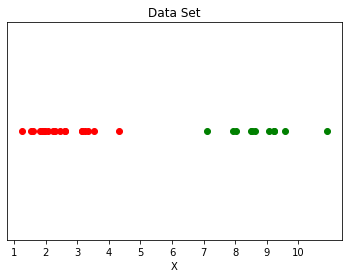

In [107]:
'''a). Plotting the dataset generated'''
plt.title('Data Set')
data.plot()

In [108]:
''' b). Implementing the threshold hypothesis '''

'''A function for bisect right'''
def bisect_right(arr, num):
    low = 0
    high = len(arr)
    while low<high:
        mid = (low+high)//2
        if arr[mid]<=num:
            low = mid+1
        else:
            high = mid
    return low

'''A function to generate the threshold hypothesis for the dataset using Emperical Risk Minimization'''
def thresholdHypothesis(data: dataSet):
    greenPoints = []
    redPoints = []
    for x,y in data:
        if y==0:
            greenPoints.append(x)
        else:
            redPoints.append(x)
    greenPoints.sort()
    redPoints.sort()
    totalred = len(redPoints)
    totalgreen = len(greenPoints)
    if totalred==0:
        return greenPoints[0]-1
    threshold = -float('inf')
    error = totalred
    for i in range(totalred):
        curError = totalred-i-1
        j = bisect_right(greenPoints, redPoints[i])
        curError+=j
        if curError<error:
            error= curError
            if j==totalgreen:
                threshold = redPoints[i]
            else:
                threshold = (redPoints[i]+greenPoints[j])/2
    
    if type(threshold) == float:
        return greenPoints[0]-1
    else:
      return threshold

''' Plotting and calculating the hypothesis '''
def plotHypothesis(data: dataSet):
    threshold = thresholdHypothesis(data)
    print("Threshold: ", threshold)
    plt.axvline(x = threshold, color = 'b', label = 'Threshold hypothesis')
    plt.legend()
    data.plot()
    

Threshold:  5.713598544705235


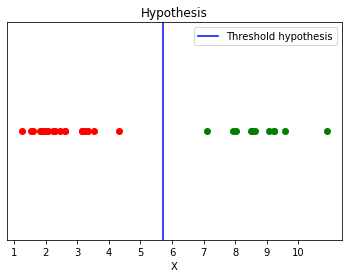

In [109]:
plt.title('Hypothesis')
plotHypothesis(data)

In [110]:


def getYValue(x, threshold):
    if x<=threshold:
        return 1
    else:
        return 0

def empericalError(data: dataSet, threshold):
    error = 0
    for x,y in data:
        if getYValue(x, threshold)!=y:
            error+=1
    return error/len(data)




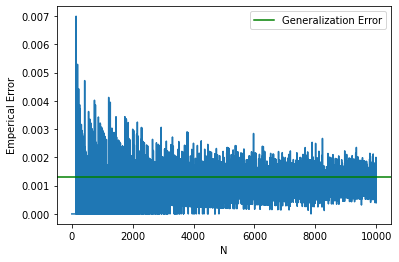

In [111]:
''' c). Best value for the threshold '''
''' We got the generalisation error for the best possible threshold to be as 0.0013 which is 0.13%'''
''' Calculating the emperical error for each value from 1 to N '''



N = 10000
generalisationError = 0.0013 # Calculated in percentage
plt.plot()
x = []
y = []
for i in range(1,N+1):
    data = dataSet(i, (9, 1), (3, 1))
    hypothesis = thresholdHypothesis(data)
    error = empericalError(data, hypothesis)
    x.append(i)
    y.append(error)
plt.plot(x,y)
plt.axhline(y = generalisationError, color = 'g', label = 'Generalization Error')
plt.legend()
plt.xlabel('N')
plt.ylabel('Emperical Error')
plt.show()
    

**TASK 2**:                                                      **(35 Marks)**

In this question, we will repeat the experiments discussed in the class with respect to polynomial regression but with a different function. 

Generate $20$ data points from function $f(x) = e^{(\pi x/8)} + \frac{x}{12\pi} + \text{noise}$ where noise$\sim \mathcal{N}(0,0.2)$ with $x$ ranging from $0$ to $10$.  **[3 Marks]**

1. Fit a polynomial regression with optimal weight vector $w^*$ computed via analytical method (using idea of matrices taught in class) and plot the curves for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

2. Fit a polynomial regression using gradient descent for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

3. Repeat the previous experiments with more number of data points and report your findings. More specifically, compare the above two approaches with respect to the solution obtained with respect to each value of M **[6 Marks]**

4. Plot runtime of both methods against variation with respect to $M$.
 **[3 Marks]**

5. Plot runtime of both methods against variation with respect to number of datapoints.  **[3 Marks]**

**Use of sci-kit or any direct implementation of linear regression is striclty probhibted. You can use numpy and pandas.**
Write your code by creating cells below.


In [112]:
#write your code here You can create more cells

In [113]:
#write your code here You can create more cells

#Adult Dataset

###About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. Our goal is to predict captial_gain using other attributes. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 


In [114]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


**TASK 3**:                                                      **(37 Marks)**

We will be understanding the concept of linear regression along with the regularization parameter on the Adult dataset which has multiple attributes. 

0. Load Adult Dataset into pandas dataframe and print it. You can randomly subsample dataset size to $10,000$ points.  
1. **Feature Normalization:** As discussed in the class, we first have to standardize all the features by subtracting with the mean and dividing by the standard deviation. Verify your technique by computing the mean and variance of the transformed data and check if the mean is $0$ and variance is $1$.  **[2 Marks (1+1) ]**

2. **$K-$Fold Cross Validation:** Randomly partition the data into a training and test set. Fix 20\% of the instances into the test set. With the remaining create training and validation sets with $K-$fold cross validation. You can take the value of $K$ to be 10.  **[3 Marks]**

3. **Stratisfied $K$-fold cross validation**: Create a balanced dataset such that each training and validation set contain balanced data representation. For the Adult dataset, consider balanced with respect to gender (male/female).Fix 20\% of the instances into the test set. Then with the remaining create balanced training and validation dataset by keeping the value of $K$ to be 10. To read more refer https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/  **[3 Marks]**

4. **Lasso-Regression:** Here, implement your own function LassoRegUnfair$(X, Y, \lambda)$ that calculates the linear least square solution with the lasso regression penalty parameter $\lambda$ and return regression weights. Use gradient descent technique to find these weights. Implement PredLassoRegUnfair(X, weights) that returns $Y$ given the input $X$ with learnt weights. (Use datasets obtained using $K$-fold cross validation (For exact definition of Lasso see the side notes below).  **[10 Marks]**

5. Repeat previous part with dataset obtained using statisfied $K$-fold validation i.e. implement LassoRegFair$(X, Y, \lambda)$  and PredLassoRegFair(X, weights).  **[10 Marks]**

6. Plot the mean square error for each of the dataset obtained from $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot.  **[3 Marks]**

7. Plot the mean square error for each of the dataset obtained from stratisfied $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Compare results with unfair model i.e. model prepared with random paritions. Such fairness is called **social fairness** in literature (refer sideNotes below).  **[3 Marks]** 

8.  Plot the training error, variance and test error against different values of $\lambda$ on datasets generated using $K$-fold validation.  Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Explain your result in the context of bias variance trade off.
 **[3 Marks]**


Write your code by creating cells below.


In [115]:
#write your code here 

In [116]:
#write your code here 

In [117]:
#write your code here You can create more cells

**Side Notes: LASSO Regularization**:
Regularization is implemented to avoid overfitting of the data. LASSO is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In this shrinkage technique, the coefficients determined in the regression model are penalized by a factor called the alpha α (or sometimes lamda). 
In the equation shown below there are basically two terms one is old least sqaure loss and other term is regularization term. The regularization term consist of a trade-off factor $λ$ followed by weight coefficient $β$'s.

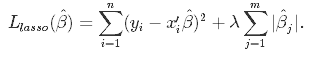

With lambda set to zero, you will find that this is the equivalent of the linear regression model with least sqaure loss. Thus lasso regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

lambda can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is. To read more visit https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

**Side Notes: Social Fairness**:


In real world machine learning deployments it is observed that the standard al
gorithm results in a model which incurs higher cost for females compared to males. Similarly it is even more noticeable among the sensitive (or protected) attribute like racial groups which can take more than two values. In light of this consideration, recent works consider a different objective. Rather than minimizing the cost over the entire dataset, the objective of socially fair model is to find a model that minimizes the average cost across different (protected) groups.

So, in simple words, if your model has loss on males nearly same as loss incured on females then your model is socially fair to group (gender). Thus, you can check if your learned model (here regressor) obeys social fairness or not?

(To read more https://arxiv.org/pdf/2006.10085.pdf).


In [118]:
#Thanks 

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.